In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/bamboo')

os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/camelia/ \
/Users/earl/Desktop/cyclamen')

0

In [37]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_thetao_path = '/Users/earl/Desktop/cyclamen/historical/mon/ocean/thetao/latest/'
hist_tauu_path = '/Users/earl/Desktop/bamboo/historical/mon/atmos/tauu/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauu_list = sorted(os.listdir(hist_tauu_path))

rcp85_thetao_path = '/Users/earl/Desktop/cyclamen/rcp85/mon/ocean/thetao/latest/'
rcp85_tauu_path = '/Users/earl/Desktop/bamboo/rcp85/mon/atmos/tauu/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauu_list = sorted(os.listdir(rcp85_tauu_path))

good_thetao_hist_list = []
good_thetao_rcp85_list = []
for hist_thetao in hist_thetao_list:
    for rcp85_thetao in rcp85_thetao_list:
        hist_thetao_now = hist_thetao
        rcp85_thetao_now = rcp85_thetao
        if hist_thetao_now[:-29] == rcp85_thetao_now[:-29]:
            good_thetao_hist_list.append(hist_thetao_now)
            good_thetao_rcp85_list.append(rcp85_thetao_now)

good_tauu_hist_list = []
good_tauu_rcp85_list = []
for hist_tauu in hist_tauu_list:
    for rcp85_tauu in rcp85_tauu_list:
        hist_tauu_now = hist_tauu
        rcp85_tauu_now = rcp85_tauu
        if hist_tauu_now[:-24] == rcp85_tauu_now[:-24]:
            good_tauu_hist_list.append(hist_tauu_now)
            good_tauu_rcp85_list.append(rcp85_tauu_now)

good_list = []
thetao_hist_good_list = []
tauu_hist_good_list = []
thetao_rcp85_good_list = []
tauu_rcp85_good_list = []
for (all_thetao_hist, all_thetao_rcp85) in zip(good_thetao_hist_list, good_thetao_rcp85_list):
    for (all_tauu_hist, all_tauu_rcp85) in zip(good_tauu_hist_list, good_tauu_rcp85_list):
        if all_thetao_hist[:-29] == all_tauu_hist[:-24]:
            print(all_thetao_hist[:-29])
            thetao_hist_good_list.append(all_thetao_hist)
            tauu_hist_good_list.append(all_tauu_hist)
            thetao_rcp85_good_list.append(all_thetao_rcp85)
            tauu_rcp85_good_list.append(all_tauu_rcp85)
            good_list.append(all_thetao_hist[:-29])
print(len(good_list))



p05_plot_anomaly_maps
ACCESS1-0
ACCESS1-3
BNU-ESM
CCSM4
CESM1-BGC
CESM1-CAM5
CESM1-WACCM
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-g2
FGOALS-s2
FIO-ESM
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
GISS-E2-H-CC
GISS-E2-H
GISS-E2-R-CC
GISS-E2-R
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MIROC5
MPI-ESM-LR
MPI-ESM-MR
MRI-CGCM3
NorESM1-ME
NorESM1-M
bcc-csm1-1-m
bcc-csm1-1
inmcm4
37


In [45]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauu_hist = {}
tauu_rcp85 = {}
tauu_anom = {}
tauu_lat = {}
tauu_lon = {}

plot_list = []

for (model_thetao_hist, model_tauu_hist, model_thetao_rcp85, model_tauu_rcp85, model) \
in zip(thetao_hist_good_list[0:1], tauu_hist_good_list[0:1], 
       thetao_rcp85_good_list[0:1], tauu_rcp85_good_list[0:1], 
       good_list[0:1]):
    
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
    
    plot_list.append(model)
    
    thetao_hist_data = xr.open_dataset(hist_thetao_path + model_thetao_hist)
    thetao_rcp85_data = xr.open_dataset(rcp85_thetao_path + model_thetao_rcp85)
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    
    tauu_hist_data = xr.open_dataset(hist_tauu_path + model_tauu_hist)
    tauu_rcp85_data = xr.open_dataset(rcp85_tauu_path + model_tauu_rcp85)
    tauu_hist[model] = tauu_hist_data['tauu'][0,:,:]
    tauu_rcp85[model] = tauu_rcp85_data['tauu'][0,:,:]

    # MPI-ESM-LR has its lon cut-off over Australia
    if model in ['MPI-ESM-LR']:
        thetao_hist_now = thetao_hist[model]
        thetao_hist[model] = thetao_hist_now.roll(i=100)
        thetao_rcp85_now = thetao_rcp85[model]
        thetao_rcp85[model] = thetao_rcp85_now.roll(i=100)
        
        tauu_hist_now = tauu_hist[model]
        tauu_hist[model] = tauu_hist_now.roll(i=100)
        tauu_rcp85_now = tauu_rcp85[model]
        tauu_rcp85[model] = tauu_rcp85_now.roll(i=100)
    
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauu_anom[model] = tauu_rcp85[model]-tauu_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
            print(model + ' OK!')
            
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
            print(model + ' OK!')
        
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
        print(model + ' OK!')
    
    if len(tauu_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauu_lat[model] = tauu_hist_data['lat'][:,0]
            tauu_lon[model] = tauu_hist_data['lon'][-1,:]
            print(model + ' OK!')
            
        else:
            tauu_lat[model] = tauu_hist_data['lat'][:,0]
            tauu_lon[model] = tauu_hist_data['lon'][0,:]
            print(model + ' OK!')
        
    else:
        tauu_lat[model] = thetao_hist_data['lat'][:]
        tauu_lon[model] = thetao_hist_data['lon'][:]
        print(model + ' OK!')
        
            
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        thetao_lon[model][0:100] += 360
        tauu_lon[model][0:100] += 360
    
    # MPI-ESM-LR lon needs to be offset...
    if model in ['MPI-ESM-LR']:
        thetao_lon[model] -= 180
        tauu_lon[model] -= 180
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauu_anom_now = tauu_anom[model]
        tauu_anom[model] = np.flipud(tauu_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauu_lat_now = tauu_lat[model]
        tauu_lat[model] = np.flipud(tauu_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1']:
        # anything that satisfies the condition is SAFE
        tauu_anom[model] = tauu_anom[model].where((tauu_anom[model] != 0), np.nan)
        
print(len(plot_list))   
        

ACCESS1-0 OK!
ACCESS1-0 OK!
1


<xarray.DataArray 'thetao' (j: 300, i: 360)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    lat      (j, i) float32 -77.8766 -77.8766 -77.8766 -77.8766 -77.8766 ...
    lev      float64 5.0
    lon      (j, i) float32 80.5 81.5 82.5 83.5 84.5 85.5 86.5 87.5 88.5 ...


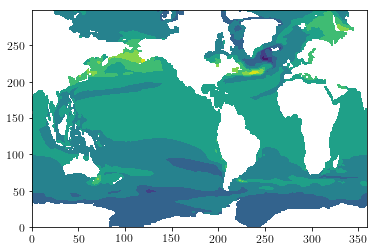

In [46]:
# thefile = open('p04_models_list.txt', 'w')

# for item in plot_list:
#     print(item)
#     thefile.write("%s\n" % item)

print(thetao_anom[model])

plt.contourf(thetao_anom[model])

TypeError: Input z must be at least a 2x2 array.

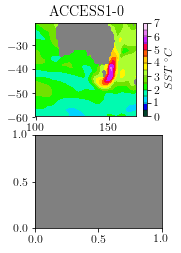

In [47]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 9
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(24, 12)

count = 0
p = 1
for idx, t in enumerate(plot_list):
    count += 1
    if count is col+1:
        count = 1
        p += 1
    
    ax = fig.add_subplot(row, col, idx+col*(p-1)+1)
    cmap = plt.get_cmap('gist_ncar')
    step = 0.5
    contf_lvls = np.arange(0,7+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    contf = plt.contourf(
        thetao_lon[t][lon_W_idx:lon_E_idx],
        thetao_lat[t][lat_S_idx:lat_N_idx],
        thetao_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap)
    ax.set_title(t)
    if t is plot_list[-1]:
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        
    
    ax = fig.add_subplot(row, col, idx+col*(p-1)+1+col)
    cmap = plt.get_cmap('bwr')
    step = 0.02
    contf_lvls = np.arange(-0.12,0.12+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(tauu_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauu_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauu_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauu_lon[t], lon_E)
    contf = plt.contourf(
        tauu_lon[t][lon_W_idx:lon_E_idx],
        tauu_lat[t][lat_S_idx:lat_N_idx],
        tauu_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap)
    ax.set_title(t)
    if t is plot_list[-1]:
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
    
    
    
#plt.suptitle(r"Wombat jra iaf mom025 tau")
plt.tight_layout()


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)
    